<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       163 non-null    float64
 1   E       163 non-null    int64  
 2   group   163 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ KB
          removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0       163      163
6.0             1         1         0         0      163
7.0             2         1         1         0      162
9.0             3         3         0         0      160
13.0            3         3         0         0      157
15.0            2         2         0         0      154
17.0            1         1         0         0      152
19.0            3         3         0         0      151
22.0            4         4         0         0      148
26.0            5     

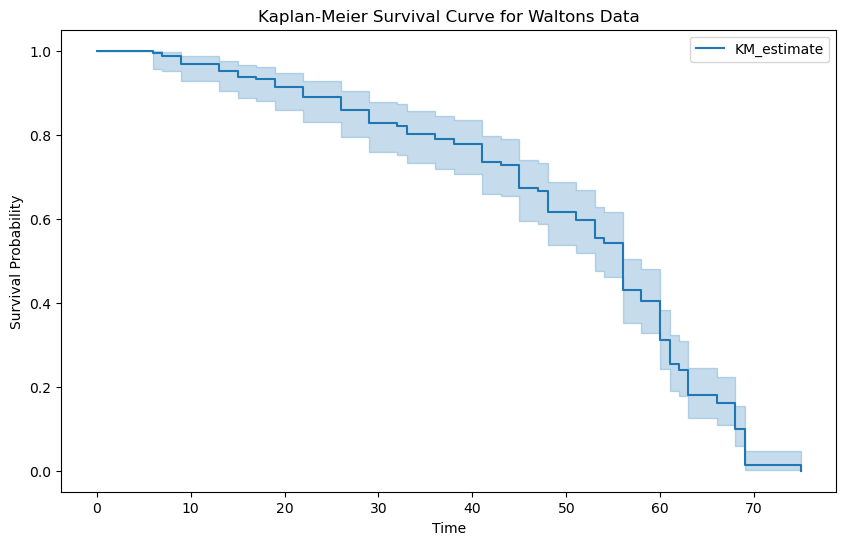

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons  
from lifelines.utils import survival_table_from_events

df = load_waltons() 
df.info()

table= survival_table_from_events(df["T"],df["E"])


kmf = KaplanMeierFitter() 

kmf.fit(df['T'], event_observed=df['E']) # fitting data 
print(table)

plt.figure(figsize=(10, 6))
kmf.plot() 

plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curve for Waltons Data")
plt.show()

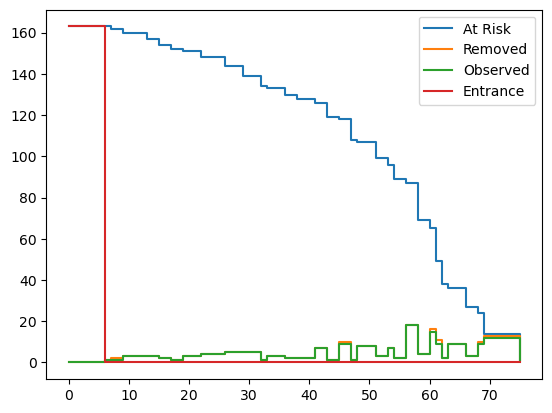

In [4]:
# plotting other indicators
plt.step(table.index, table["at_risk"], where="post", label="At Risk")
plt.step(table.index, table["removed"], where="post", label="Removed")
plt.step(table.index, table["observed"], where="post", label="Observed")
plt.step(table.index, table["entrance"], where="post", label="Entrance")
plt.legend()